<a href="https://colab.research.google.com/github/enino84/VisualAnalytics/blob/main/CEC_PRO_01032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analítica - Visualización**

In [ ]:
import pandas as pd
import seaborn as sns

## 1. Cargar toda la información

In [ ]:
df_compras = pd.read_csv('drive/MyDrive/CEC_PRO/Compras.csv')
df_clientes = pd.read_excel('drive/MyDrive/CEC_PRO/Datos_Clientes.xlsx')
df_productos = pd.read_excel('drive/MyDrive/CEC_PRO/Productos.xlsx')

In [ ]:
df_clientes.columns

Index(['Apellidos', 'Nombre 1', 'Nombre 2', 'Edad', 'Sexo', 'Tipo Doc',
       'Numero', 'Fecha de Nacimiento', 'Ciudad de Nacimiento', 'Departamento',
       'Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude',
       'Longitude', 'Score Cliente', 'Riesgo Cliente'],
      dtype='object')

In [ ]:
df_clientes.describe()

Edad      Numero  ...   Longitude  Score Cliente
count  500.000000  500.000000  ...  500.000000     500.000000
mean    20.604000  249.500000  ...  -74.785291     133.236285
std      2.197463  144.481833  ...    0.006813      78.847000
min     16.000000    0.000000  ...  -74.800239      10.133572
25%     19.000000  124.750000  ...  -74.790963      55.976370
50%     20.000000  249.500000  ...  -74.784778     139.497494
75%     22.000000  374.250000  ...  -74.780702     229.944851
max     30.000000  499.000000  ...  -74.766066     256.884467

[8 rows x 8 columns]

# Correlación

1. Medida normalizada de la covarianza (cómo cambia una variable con fundamento en otra)
2. Correlación siempre está entre [-1, 1].
3. Correlación negativa - <0
* Relación lineal inversamente proporcional (ej., una variable crece, la otra decrece).
4. Correlación positiva + >0
* Relación lineal directamente proporcional (ej., una variable crece, la otra crece).
5. Correlación nula     0 =0

In [ ]:
df_clientes.columns

Index(['Apellidos', 'Nombre 1', 'Nombre 2', 'Edad', 'Sexo', 'Tipo Doc',
       'Numero', 'Fecha de Nacimiento', 'Ciudad de Nacimiento', 'Departamento',
       'Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude',
       'Longitude', 'Score Cliente', 'Riesgo Cliente'],
      dtype='object')

# `pairplot`

https://seaborn.pydata.org/generated/seaborn.pairplot.html

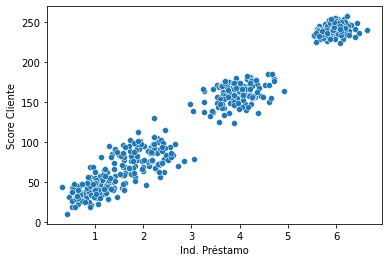

In [ ]:
sns.scatterplot(data=df_clientes, x='Ind. Préstamo', y='Score Cliente')

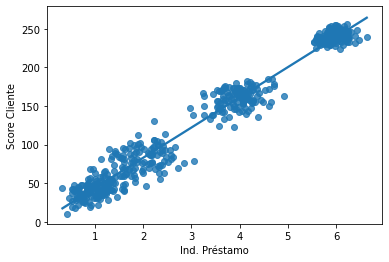

In [ ]:
sns.regplot(data=df_clientes, x="Ind. Préstamo", y='Score Cliente')

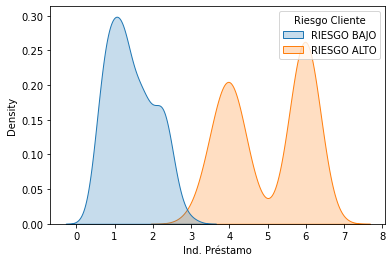

In [ ]:
sns.kdeplot(data=df_clientes, x='Ind. Préstamo', fill=True, hue='Riesgo Cliente')

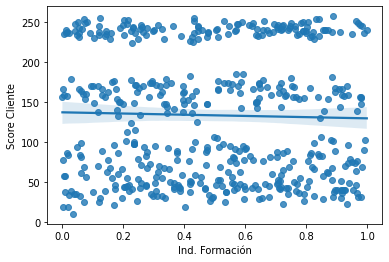

In [ ]:
sns.regplot(data=df_clientes, x='Ind. Formación', y='Score Cliente')

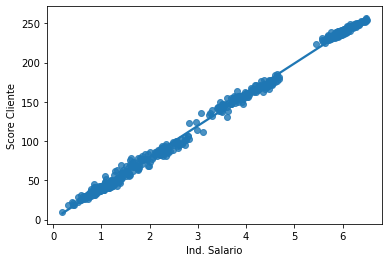

In [ ]:
sns.regplot(data=df_clientes, x='Ind. Salario', y='Score Cliente')

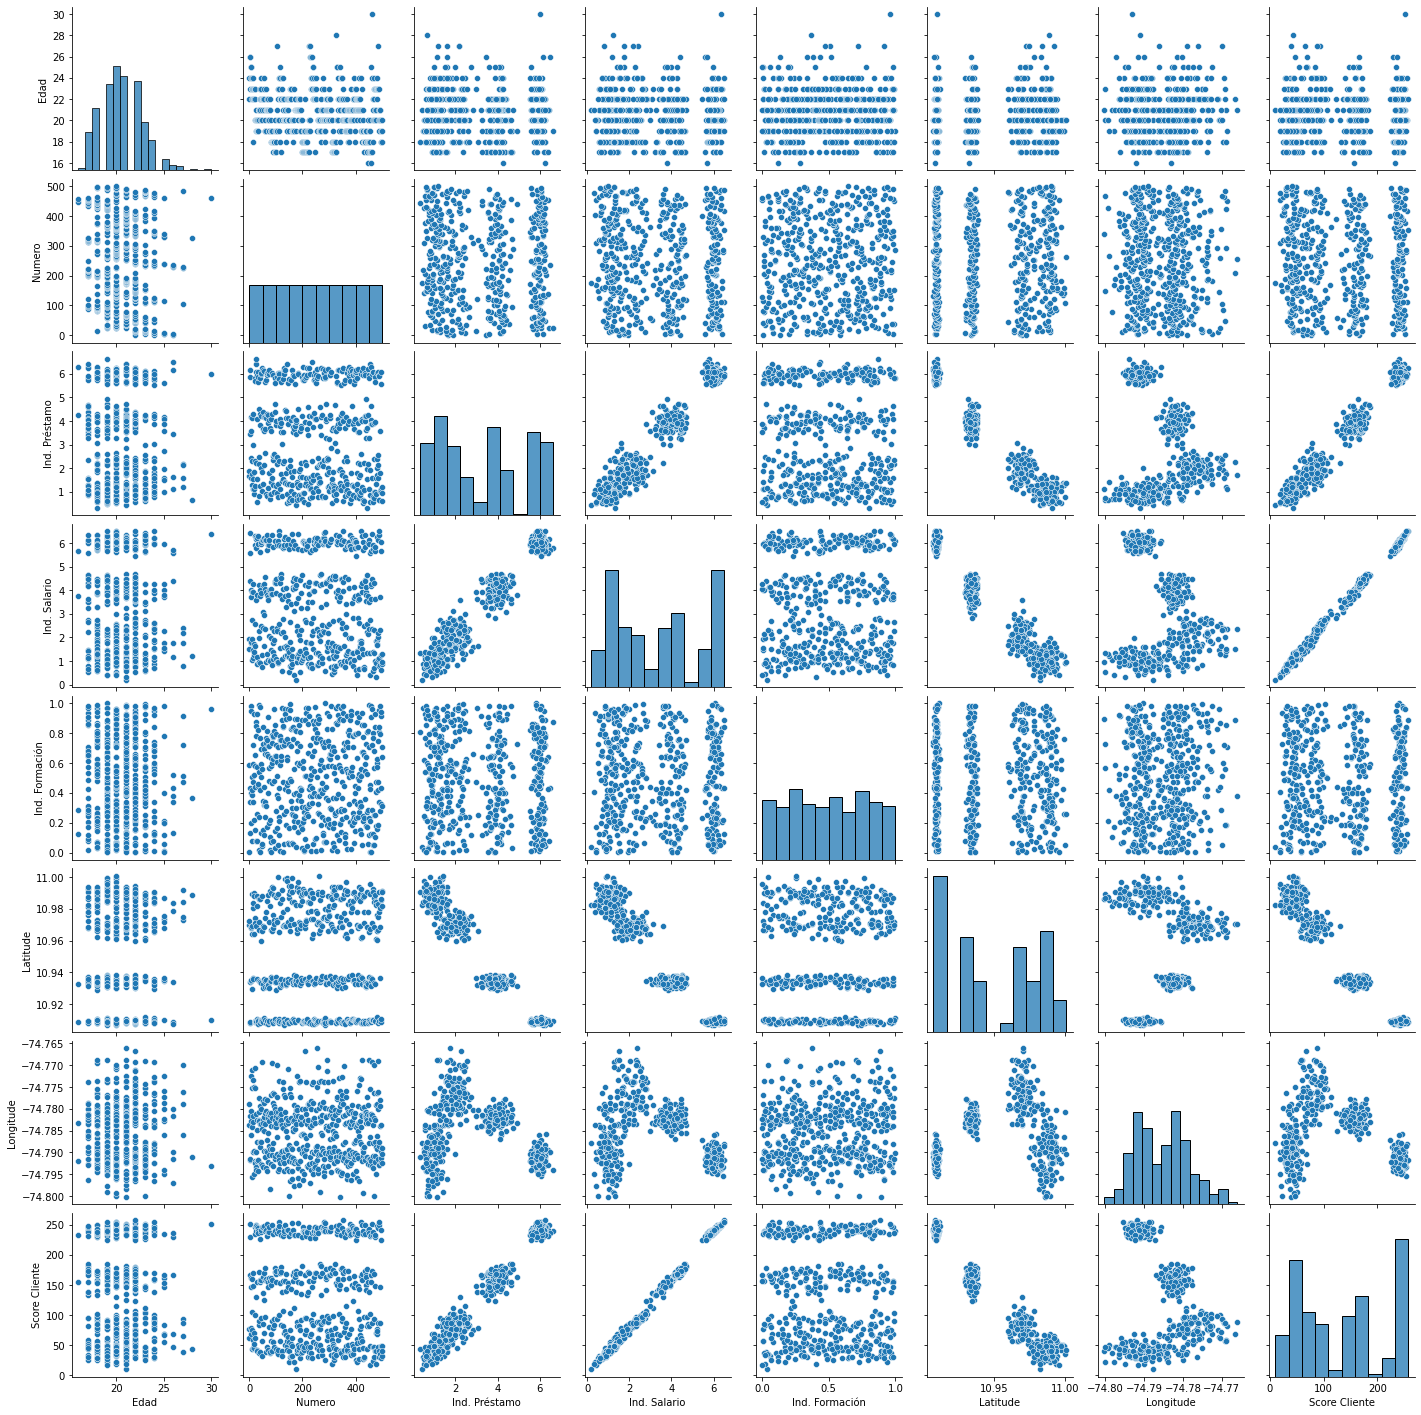

In [ ]:
sns.pairplot(data=df_clientes)

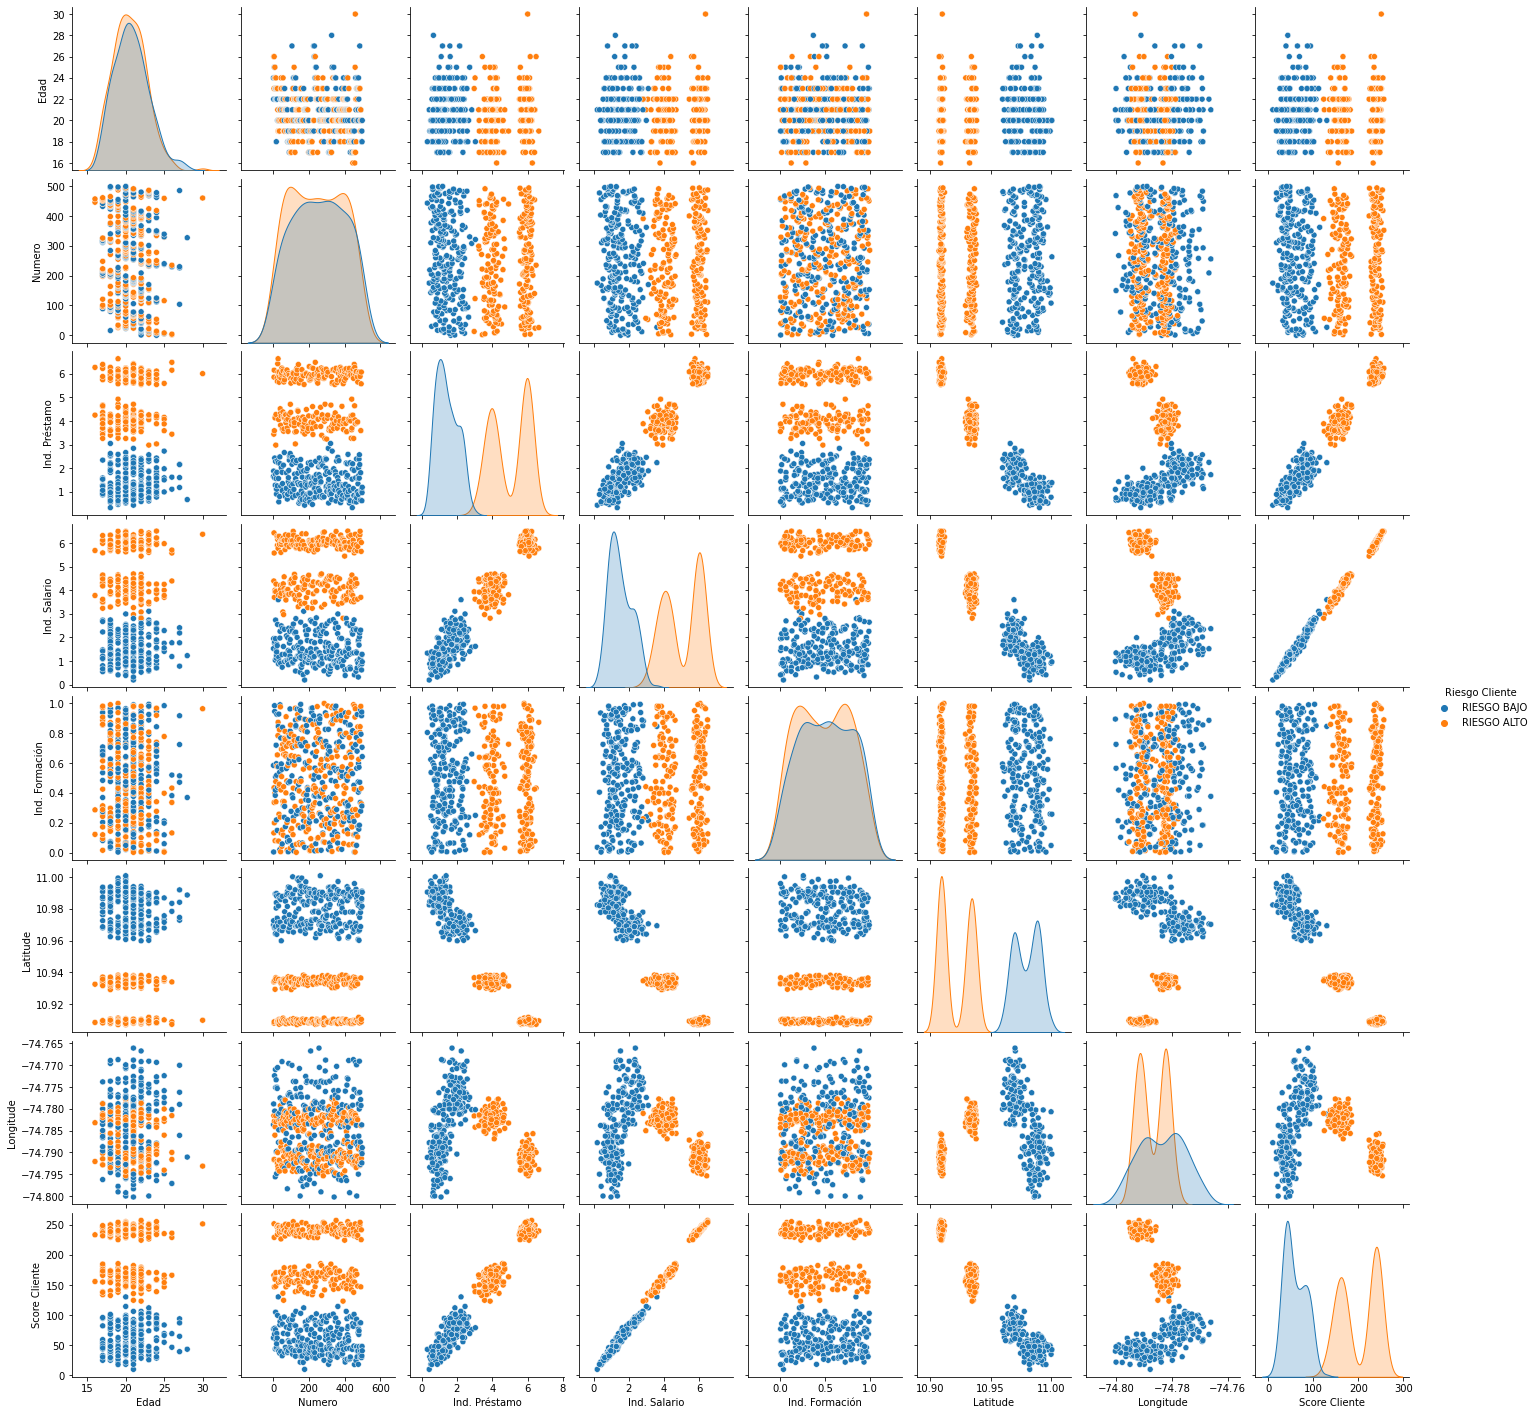

In [ ]:
sns.pairplot(data=df_clientes, hue='Riesgo Cliente')

In [ ]:
df_clientes.columns

Index(['Apellidos', 'Nombre 1', 'Nombre 2', 'Edad', 'Sexo', 'Tipo Doc',
       'Numero', 'Fecha de Nacimiento', 'Ciudad de Nacimiento', 'Departamento',
       'Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude',
       'Longitude', 'Score Cliente', 'Riesgo Cliente'],
      dtype='object')

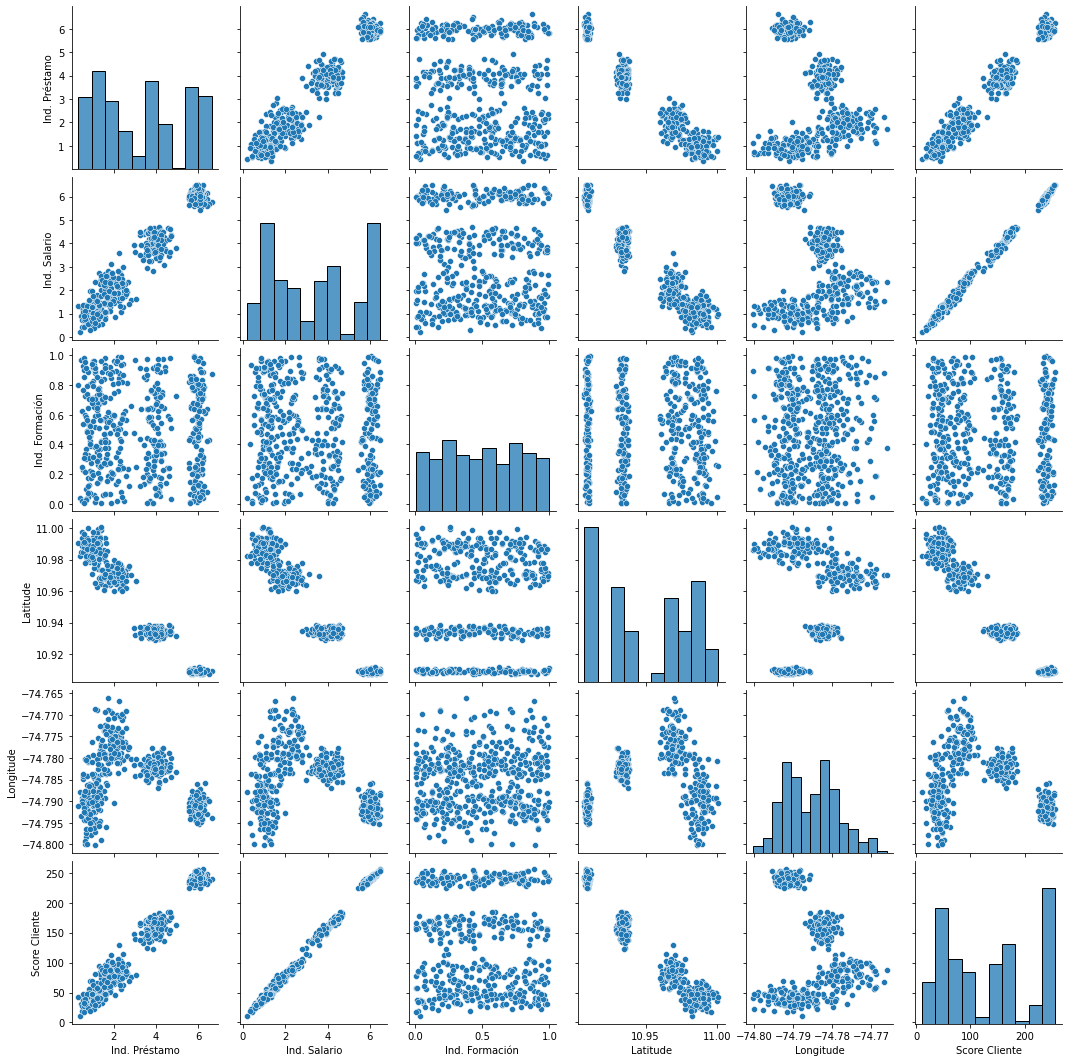

In [ ]:
vars_x = ['Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude','Longitude', 'Score Cliente'];
vars_y = ['Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude','Longitude', 'Score Cliente'];
sns.pairplot(data=df_clientes, x_vars=vars_x, y_vars=vars_y)

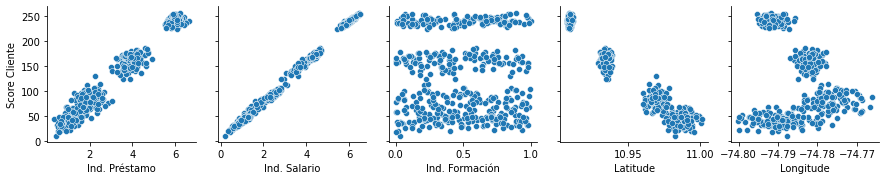

In [ ]:
vars_x = ['Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude','Longitude'];
vars_y = ['Score Cliente'];
sns.pairplot(data=df_clientes, x_vars=vars_x, y_vars=vars_y)

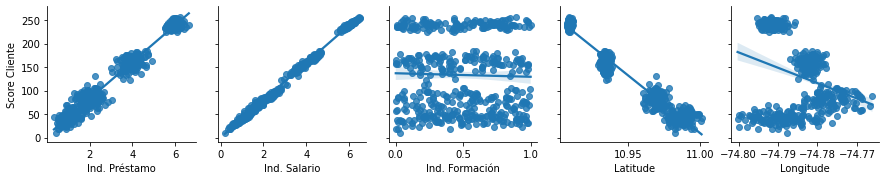

In [ ]:
vars_x = ['Ind. Préstamo', 'Ind. Salario', 'Ind. Formación', 'Latitude','Longitude'];
vars_y = ['Score Cliente'];
sns.pairplot(data=df_clientes, x_vars=vars_x, y_vars=vars_y, kind='reg')

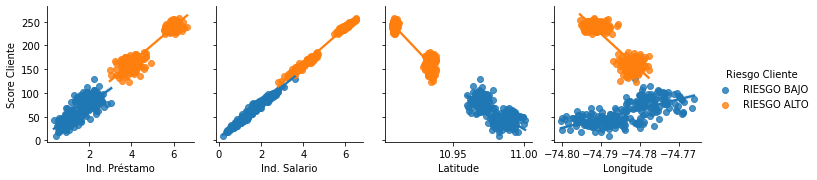

In [ ]:
vars_x = ['Ind. Préstamo', 'Ind. Salario', 'Latitude','Longitude'];
vars_y = ['Score Cliente'];
sns.pairplot(data=df_clientes, x_vars=vars_x, y_vars=vars_y, kind='reg', hue='Riesgo Cliente')

# Matrix de Correlación

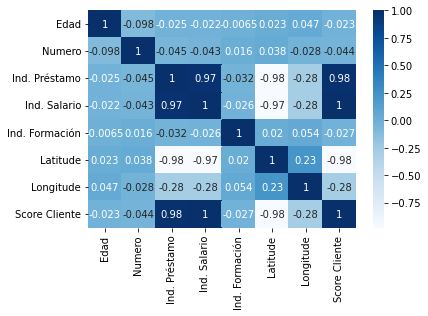

In [ ]:
sns.heatmap(df_clientes.corr(), annot=True, cmap='Blues')

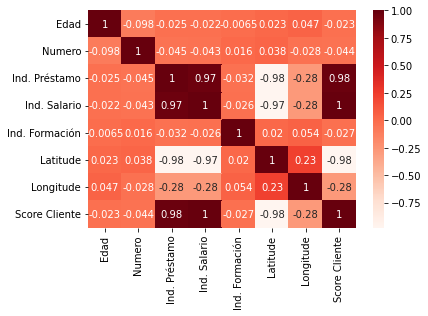

In [ ]:
sns.heatmap(df_clientes.corr(), annot=True, cmap='Reds')

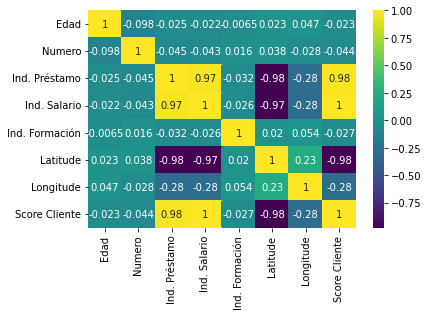

In [ ]:
sns.heatmap(df_clientes.corr(), annot=True, cmap='viridis')

# **Cinthia - ?**

# `sklearn`

https://scikit-learn.org/stable/ 

In [ ]:
from sklearn.linear_model import LinearRegression

indicador_salario  = df_clientes['Ind. Salario'].values.reshape(-1,1);
score_cliente      = df_clientes['Score Cliente'].values;

In [ ]:
indicador_salario.shape

(500, 1)

## **1. Creamos y entrenamos el modelo**

In [ ]:
modelo_lineal = LinearRegression();
modelo_entrenado = modelo_lineal.fit(indicador_salario, score_cliente);

## **2. Obtenemos los parámetros del modelo**

score_cliente = b0 + b1*indicador_salario + error

In [ ]:
modelo_entrenado.coef_

array([39.71099296])

In [ ]:
modelo_entrenado.intercept_

0.38624679275108065

score_cliente = 0.38624679275108065 + 39.71099296*indicador_salario + error

## **3. Residuales**

In [ ]:
error = score_cliente - modelo_entrenado.predict(indicador_salario)

error_1 = error;

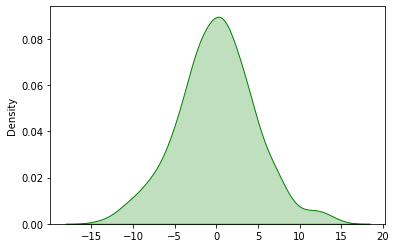

In [ ]:
sns.kdeplot(error, fill=True, color='green')

## **4. Score**

## 4.1. Accuracy

In [ ]:
modelo_entrenado.score(indicador_salario, score_cliente)

0.9964510494584907

## 4.2. Error

In [ ]:
1-modelo_entrenado.score(indicador_salario, score_cliente)

0.003548950541509277

# **Otro modelo variable correlación fuerte con salida**

In [ ]:
inputs  = df_clientes[['Ind. Salario', 'Ind. Préstamo']].values;
score_cliente      = df_clientes['Score Cliente'].values;

In [ ]:
inputs.shape

(500, 2)

In [ ]:
modelo_lineal = LinearRegression();
modelo_entrenado = modelo_lineal.fit(inputs, score_cliente);

score_cliente = b0 + b1 indicador\_salario + b2 indicador_préstamo + error

In [ ]:
modelo_entrenado.coef_

array([30., 10.])

In [ ]:
modelo_entrenado.intercept_

0.0

score_cliente = 30 indicador\_salario + 10 indicador_préstamo + error

In [ ]:
error = score_cliente - modelo_entrenado.predict(inputs)

error_2 = error;

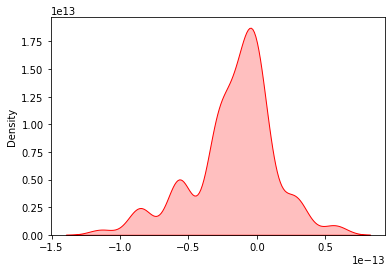

In [ ]:
sns.kdeplot(error, fill=True, color='red')

In [ ]:
modelo_entrenado.score(inputs, score_cliente)

1.0

## **Otro modelo variable poca correlación con salida**

In [ ]:
inputs  = df_clientes[['Ind. Salario', 'Ind. Formación']].values;
score_cliente      = df_clientes['Score Cliente'].values;

In [ ]:
# 1. Creación y entreamiento
modelo_lineal = LinearRegression();
modelo_entrenado.fit(inputs, score_cliente);

# 2. Estimación de la distribución del error
error = score_cliente-modelo_entrenado.predict(inputs);
error_3 = error;

# 3. Score del modelo
modelo_entrenado.score(inputs, score_cliente)

0.9964545387801265

In [ ]:
modelo_entrenado.coef_

array([39.70908566, -0.51242857])

In [ ]:
modelo_entrenado.intercept_

0.6462393660944485

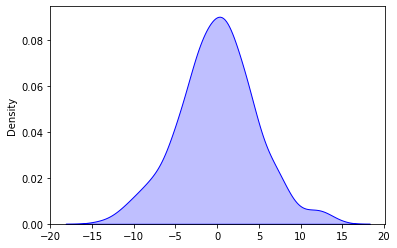

In [ ]:
sns.kdeplot(error, fill=True, color='blue')

Comparar las gráficas de los errores

1. score_cliente = 0.38624679275108065 + 39.71099296*indicador_salario + error
2. score_cliente = 30 indicador\_salario + 10 indicador_préstamo + error
3. score_cliente = 0.6462393660944485 + 39.70 indicador\_salario - 0.51 indicador_formación + error

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


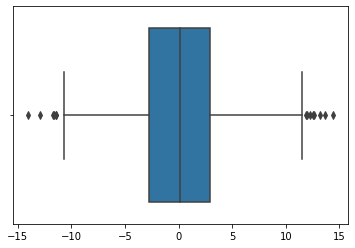

In [ ]:
sns.boxplot(error_1);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


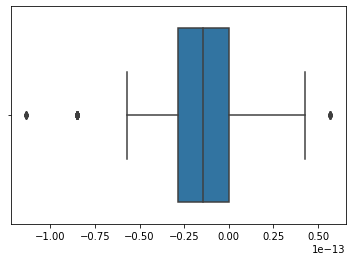

In [ ]:
sns.boxplot(error_2);

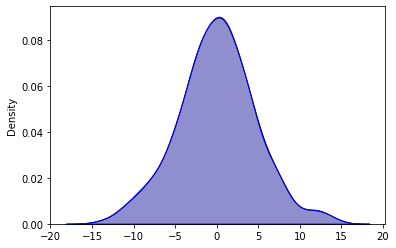

In [ ]:
sns.kdeplot(error_1, fill=True, color='black');
sns.kdeplot(error_3, fill=True, color='blue');

# **Visualización**

## Folium - https://python-visualization.github.io/folium/modules.html

## OpenStreetMap

https://www.openstreetmap.org/#map=19/11.00665/-74.82565

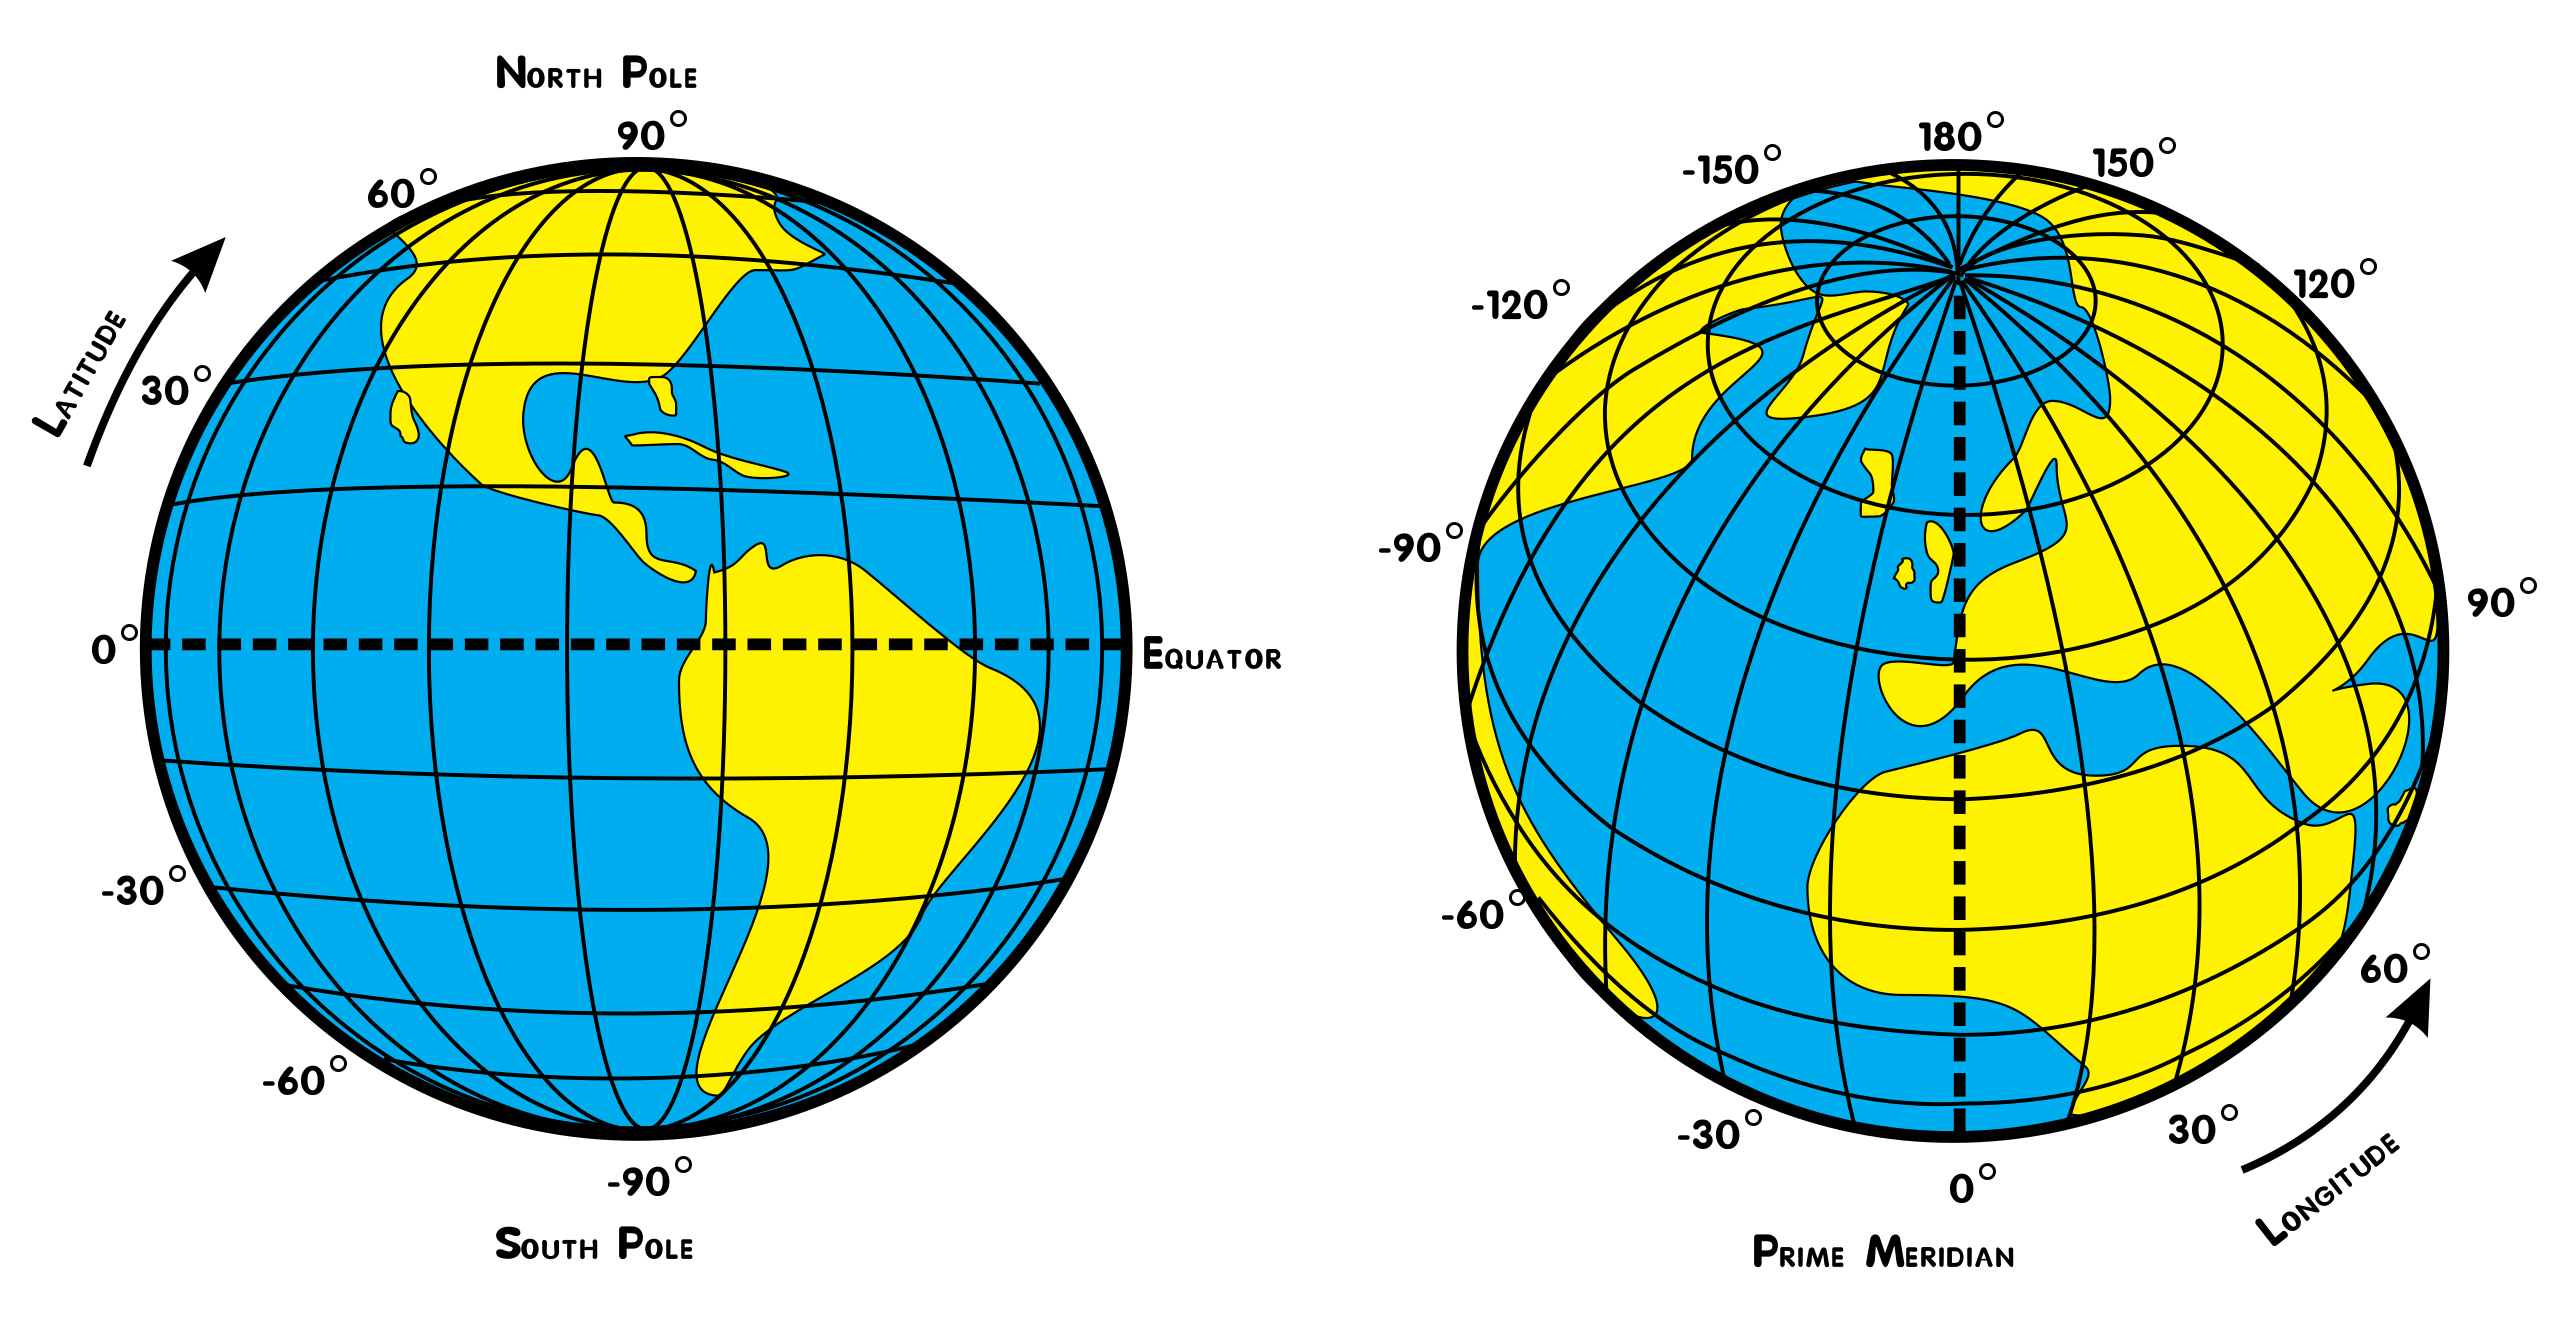

Tomado de https://www.google.com/url?sa=i&url=https%3A%2F%2Fes.m.wikibooks.org%2Fwiki%2FArchivo%3ALatitude_and_Longitude_of_the_Earth.svg&psig=AOvVaw1wgMPm6rmLu2usnONdYtcx&ust=1646238263632000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPCR18mppfYCFQAAAAAdAAAAABAD

(lon, lat) = (x, y)

In [ ]:
import folium as fl

## Default Map

In [ ]:
fl.Map(location=[11.00665,-74.82565], zoom_start=15)

## Default Zonas Verdes

In [ ]:
fl.Map(location=[11.00665,-74.82565], zoom_start=15, tiles='Stamen Terrain')

## Only rodas

In [ ]:
fl.Map(location=[11.00665,-74.82565], zoom_start=15, tiles='Stamen Toner')

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
fl.Marker(location=[11.00665,-74.82565]).add_to(m)
m

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
fl.Marker(location=[11.00665,-74.82565], popup='Esto es un popup').add_to(m)
m

https://fontawesome.com/search?p=1&q=car&s=solid%2Cbrands

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
icono = fl.Icon(color='red', icon='car', prefix='fa')
fl.Marker(location=[11.00665,-74.82565], icon=icono, popup='Esto es un popup').add_to(m)
m


In [ ]:
df_clientes[['Longitude','Latitude']]

Longitude   Latitude
0   -74.783629  10.969795
1   -74.778881  10.972486
2   -74.781556  10.933945
3   -74.791701  10.908011
4   -74.791618  10.908847
..         ...        ...
495 -74.789829  10.985574
496 -74.783689  10.986455
497 -74.792416  10.991098
498 -74.790291  10.981584
499 -74.788921  10.990440

[500 rows x 2 columns]

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
for i in range(0, 500):
  cliente = df_clientes.iloc[i];
  icono = fl.Icon(color='red', icon='car', prefix='fa')
  fl.Marker(location=[cliente['Latitude'],cliente['Longitude']], 
            icon=icono, popup=cliente['Apellidos']).add_to(m)
m

# **Dónde abrir una nueva tienda (ubicación de los clientes)**

# `HeatMap`



In [ ]:
from folium.plugins import HeatMap

In [ ]:
data_map = df_clientes[['Latitude','Longitude']].values.tolist();

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
HeatMap(data_map).add_to(m);
m

In [ ]:
m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
HeatMap(data_map).add_to(fl.FeatureGroup(name='Clientes Barranquilla').add_to(m));
fl.LayerControl().add_to(m);
m

In [ ]:
bajo_riesgo = df_clientes['Riesgo Cliente']=='RIESGO BAJO'
alto_riesgo = df_clientes['Riesgo Cliente']=='RIESGO ALTO'

data_br = df_clientes[bajo_riesgo][['Latitude','Longitude']].values.tolist();
data_ar = df_clientes[alto_riesgo][['Latitude','Longitude']].values.tolist();

m = fl.Map(location=[11.00665,-74.82565], zoom_start=15);
HeatMap(data_br).add_to(fl.FeatureGroup(name='Clientes Bajo Riesgo').add_to(m));
HeatMap(data_ar).add_to(fl.FeatureGroup(name='Clientes Alto Riesgo').add_to(m));
fl.LayerControl().add_to(m);
m.save('Reporte_Clientes.html')

In [ ]:
bajo_riesgo

0       True
1       True
2      False
3      False
4      False
       ...  
495     True
496     True
497     True
498     True
499     True
Name: Riesgo Cliente, Length: 500, dtype: bool

In [ ]:
df_clientes['Riesgo Cliente'].unique()

array(['RIESGO BAJO', 'RIESGO ALTO'], dtype=object)